In [2]:
#https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/
#https://www.youtube.com/watch?v=b8qqoBX4B7Y

import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from IPython.display import Image  
from sklearn import tree
from sklearn import metrics

cancer = load_breast_cancer()

In [3]:
print len(cancer)
print
print type(cancer)
print
print cancer.feature_names
print
print cancer.features
print
print cancer.target
print
print cancer.target_names
print
print cancer.data.shape
print
print cancer.target.shape

SyntaxError: invalid syntax (<ipython-input-3-e9a5990473c1>, line 1)

In [41]:
X = cancer.data
y = cancer.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
#X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)


In [42]:
clf = DecisionTreeClassifier(random_state=0, max_depth = 3,  min_samples_leaf = 7)
# max_depth = None,  min_samples_leaf = 1, 
clf.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(clf.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy on the training subset: 0.968
Accuracy on the test subset: 0.921


In [43]:
y_pred_class = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))

[[ 66   8]
 [ 10 144]]
0.921052631579


In [44]:
# calculate null accuracy (for binary classification problems coded as 0/1)
print max(y_test.mean(), 1 - y_test.mean())


0.675438596491


In [45]:
# try max_depth 1 through 6 and record training and testing accuracy
depth_range = list(range(1, 10))
train_scores = []
test_scores = []
for i in depth_range:
    clf = DecisionTreeClassifier(random_state=0, max_depth = i)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

Text(0,0.5,u'Accuracy')

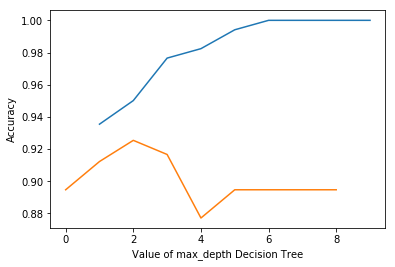

In [46]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(depth_range, train_scores, test_scores)
plt.xlabel('Value of max_depth Decision Tree')
plt.ylabel('Accuracy')

In [47]:
# try leaf 1 through 20 and record training and testing accuracy
leaf_range = list(range(1, 20))
train_scores = []
test_scores = []
for i in leaf_range:
    clf = DecisionTreeClassifier(random_state=0, min_samples_leaf = i)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

Text(0,0.5,u'Accuracy')

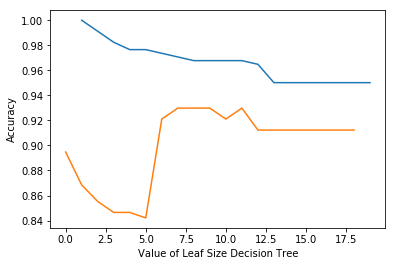

In [48]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(leaf_range, train_scores, test_scores)
plt.xlabel('Value of Leaf Size Decision Tree')
plt.ylabel('Accuracy')

In [49]:
# try different test sizes and record training and testing accuracy
test_size = [.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]
ylims = [0,1,2,3,4,5,6,7,8,9,10]
train_scores = []
test_scores = []
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    clf = DecisionTreeClassifier(random_state=0, max_depth = 4,  min_samples_leaf = 7)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

Text(0,0.5,u'Accuracy')

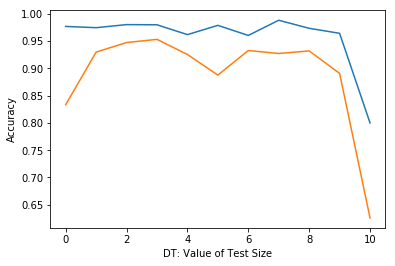

In [50]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(ylims, train_scores, test_scores)
plt.xlabel('DT: Value of Test Size')
plt.ylabel('Accuracy')

In [51]:
###### HOLDOUT ########

# Holdout 20%
X = cancer.data
y = cancer.target
X, X_test_holdout, y, y_test_holdout = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y)

train accuracy:  [95.110024449877756, 97.252747252747255, 95.283018867924525, 94.871794871794862, 96.916299559471369, 95.604395604395606, 95.588235294117652, 97.802197802197796, 97.777777777777771]

cv accuracy:  [92.663472706155616, 93.100205468626527, 92.751405180840649, 90.910663410663403, 88.992094861660064, 88.34881320949431, 91.758241758241766, 93.444444444444457, 91.5]



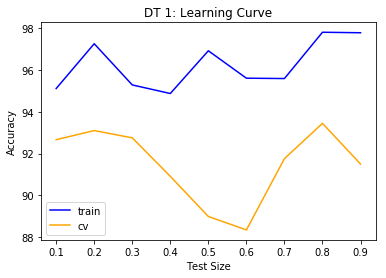

In [52]:
##### Learning Curve########

# try different test sizes and record training and testing and cv accuracy
test_size = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
ylims = [0,1,2,3,4,5,6,7,8]
train_scores = []
test_scores = []
cv_scores = []
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    clf = DecisionTreeClassifier(max_depth = 4,  min_samples_leaf = 7)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    train_scores.append(clf.score(X_train, y_train)*100)
    test_scores.append(clf.score(X_test, y_test)*100)
    cv = cross_val_score(clf, X_train, y_train, cv=10)
    cv_mean = np.array(cv).mean() * 100
    cv_scores.append(cv_mean)
    
print "train accuracy: ", train_scores
print
#print test_scores
#print
print "cv accuracy: ", cv_scores
print

plt.plot(test_size, train_scores, color='blue', label='train')
plt.plot(test_size, cv_scores, color='orange', label='cv')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('DT 1: Learning Curve')
plt.legend()

train accuracy:  [100.0, 99.413489736070375, 98.826979472140764, 97.94721407624634, 97.94721407624634, 97.067448680351902, 96.187683284457478, 95.894428152492679, 94.721407624633429, 94.721407624633429, 94.721407624633429, 94.721407624633429, 94.721407624633429, 94.721407624633429, 94.42815249266863, 94.42815249266863, 94.42815249266863, 94.134897360703818, 93.841642228739005]

cv accuracy:  [90.943977591036401, 89.255920550038198, 90.130379424497065, 90.684491978609628, 90.424497071555891, 91.2900432900433, 91.558441558441544, 91.86147186147187, 91.86147186147187, 91.86147186147187, 91.86147186147187, 91.575757575757578, 91.2900432900433, 91.2900432900433, 91.2900432900433, 90.987012987012989, 90.701298701298711, 90.415584415584419, 91.272727272727266]



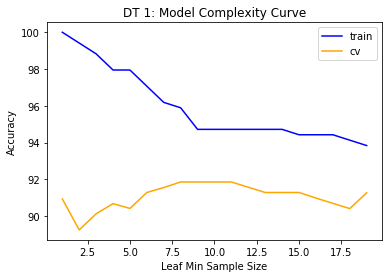

In [53]:
###### Model Complexity ########

# try leaf 1 through 20 and record training and testing accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y)
leaf_range = list(range(1, 20))
train_scores = []
test_scores = []
cv_scores = []
for i in leaf_range:
    clf = DecisionTreeClassifier(min_samples_leaf = i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    train_scores.append(clf.score(X_train, y_train)*100)
    test_scores.append(clf.score(X_test, y_test)*100)
    cv = cross_val_score(clf, X_train, y_train, cv=10)
    cv_mean = np.array(cv).mean() * 100
    cv_scores.append(cv_mean)

print "train accuracy: ", train_scores
print
#print test_scores
#print
print "cv accuracy: ", cv_scores
print

plt.plot(leaf_range, train_scores, color='blue', label='train')
plt.plot(leaf_range, cv_scores, color='orange', label='cv')
plt.xlabel('Leaf Min Sample Size')
plt.ylabel('Accuracy')
plt.title('DT 1: Model Complexity Curve')
plt.legend()

In [63]:
##### Test Model On Holdout Group  #####

clf = DecisionTreeClassifier( max_depth = 2,  min_samples_leaf = 3)
clf.fit(X, y)

y_pred = clf.predict(X_test_holdout)

print('Accuracy on the training subset: {:.3f}'.format(clf.score(X, y)))
print('Accuracy on the test subset: {:.3f}'.format(clf.score(X_test_holdout, y_test_holdout)))
print(metrics.confusion_matrix(y_test_holdout, y_pred))

Accuracy on the training subset: 0.958
Accuracy on the test subset: 0.965
[[41  3]
 [ 1 69]]


In [110]:
#https://archive.ics.uci.edu/ml/datasets/Image+Segmentation

In [111]:
###########  image segmentation  ########

In [17]:
import pandas as pd
data = pd.read_csv('C:/Users/443966/Desktop/image_segmentation_1.csv')

In [18]:
print data.shape
print data.head()

(2310, 20)
   CLASS  REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  \
0      1                  140                  125                   9   
1      1                  188                  133                   9   
2      1                  105                  139                   9   
3      1                   34                  137                   9   
4      1                   39                  111                   9   

   SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2  VEDGE-MEAN  VEDGE-SD  \
0                   0.0                   0.0    0.277778  0.062963   
1                   0.0                   0.0    0.333333  0.266667   
2                   0.0                   0.0    0.277778  0.107407   
3                   0.0                   0.0    0.500000  0.166667   
4                   0.0                   0.0    0.722222  0.374074   

   HEDGE-MEAN  HEDGE-SD  INTENSITY-MEAN  RAWRED-MEAN  RAWBLUE-MEAN  \
0    0.666667  0.311111        6.185185     7.3

In [19]:
#X = data['REGION-CENTROID-COL':'HUE-MEAN']
X = data[data.columns.difference(['CLASS'])]
y = data['CLASS']


In [20]:
print X.shape
print y.shape

(2310, 19)
(2310L,)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [22]:
clf = DecisionTreeClassifier(random_state=0, max_depth = 3,  min_samples_leaf = 7)
# max_depth = None,  min_samples_leaf = 1, 
clf.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(clf.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy on the training subset: 0.574
Accuracy on the test subset: 0.563


In [23]:
y_pred_class = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))
cm=metrics.confusion_matrix(y_test, y_pred_class)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print cm

[[  0   0   0 124   0   0   0]
 [  0 143   0   0   0   0   0]
 [  0   0   0 135   0   0   0]
 [  0   0   0 114   0   1   0]
 [  0   0   0 144   0   0   0]
 [  0   0   0   0   0 133   0]
 [  0   0   0   0   0   0 130]]
0.562770562771
[[ 0.          0.          0.          1.          0.          0.          0.        ]
 [ 0.          1.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.          0.          0.        ]
 [ 0.          0.          0.          0.99130435  0.          0.00869565
   0.        ]
 [ 0.          0.          0.          1.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          1.        ]]


In [24]:
print(metrics.confusion_matrix(y_test, y_test))


[[124   0   0   0   0   0   0]
 [  0 143   0   0   0   0   0]
 [  0   0 135   0   0   0   0]
 [  0   0   0 115   0   0   0]
 [  0   0   0   0 144   0   0]
 [  0   0   0   0   0 133   0]
 [  0   0   0   0   0   0 130]]


In [25]:
# try max_depth 1 through 6 and record training and testing accuracy
depth_range = list(range(1, 10))
train_scores = []
test_scores = []
for i in depth_range:
    clf = DecisionTreeClassifier(random_state=0, max_depth = i)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

Text(0,0.5,u'Accuracy')

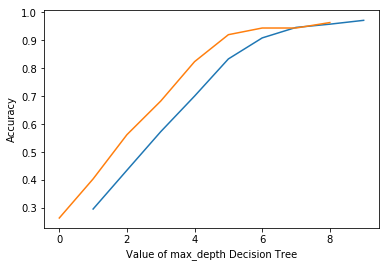

In [26]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(depth_range, train_scores, test_scores)
plt.xlabel('Value of max_depth Decision Tree')
plt.ylabel('Accuracy')

In [27]:
# try leaf 1 through 20 and record training and testing accuracy
leaf_range = list(range(1, 20))
train_scores = []
test_scores = []
for i in leaf_range:
    clf = DecisionTreeClassifier(random_state=0, min_samples_leaf = i)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

Text(0,0.5,u'Accuracy')

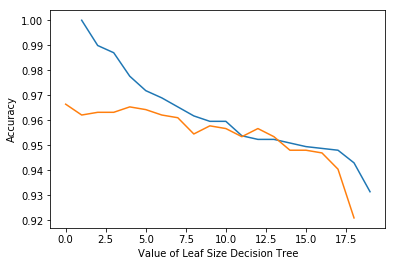

In [28]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(leaf_range, train_scores, test_scores)
plt.xlabel('Value of Leaf Size Decision Tree')
plt.ylabel('Accuracy')

In [29]:
# try different test sizes and record training and testing accuracy
test_size = [.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]
ylims = [0,1,2,3,4,5,6,7,8,9,10]
train_scores = []
test_scores = []
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    clf = DecisionTreeClassifier(random_state=0, max_depth = 4,  min_samples_leaf = 7)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

Text(0,0.5,u'Accuracy')

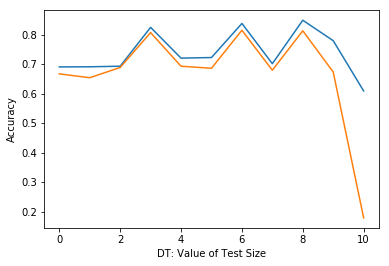

In [30]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(ylims, train_scores, test_scores)
plt.xlabel('DT: Value of Test Size')
plt.ylabel('Accuracy')

In [31]:
cross_val_score(clf, X, y, cv=10)

array([ 0.69264069,  0.7012987 ,  0.6969697 ,  0.68398268,  0.71428571,
        0.70562771,  0.70562771,  0.70995671,  0.61904762,  0.63636364])

In [33]:
###### HOLDOUT ########

# Holdout 20%
X = data[data.columns.difference(['CLASS'])]
y = data['CLASS']
X, X_test_holdout, y, y_test_holdout = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y)

train accuracy:  [69.933854479855682, 69.079837618403246, 69.992266047950508, 72.111913357400724, 72.186147186147181, 72.124492557510138, 72.924187725631768, 70.189701897018978, 78.260869565217391]

cv accuracy:  [69.508454544294125, 69.147367291679828, 69.74212647476439, 70.847836893962167, 70.657858803304762, 70.501111088545215, 72.541333908541645, 69.39030702188596, 80.03517483548444]



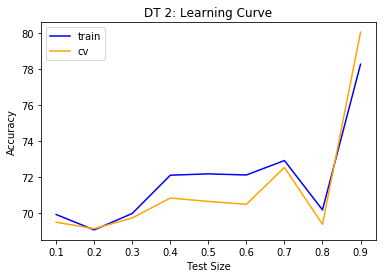

In [34]:


##### Learning Curve########

# try different test sizes and record training and testing and cv accuracy
test_size = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
ylims = [0,1,2,3,4,5,6,7,8]
train_scores = []
test_scores = []
cv_scores = []
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    clf = DecisionTreeClassifier(max_depth = 4,  min_samples_leaf = 7)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    train_scores.append(clf.score(X_train, y_train)*100)
    test_scores.append(clf.score(X_test, y_test)*100)
    cv = cross_val_score(clf, X_train, y_train, cv=10)
    cv_mean = np.array(cv).mean() * 100
    cv_scores.append(cv_mean)
    
print "train accuracy: ", train_scores
print
#print test_scores
#print
print "cv accuracy: ", cv_scores
print

plt.plot(test_size, train_scores, color='blue', label='train')
plt.plot(test_size, cv_scores, color='orange', label='cv')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('DT 2: Learning Curve')
plt.legend()



train accuracy:  [100.0, 99.456521739130437, 97.282608695652172, 96.195652173913047, 96.195652173913047, 96.195652173913047, 96.195652173913047, 96.195652173913047, 96.195652173913047, 95.652173913043484, 95.108695652173907, 94.565217391304344, 94.565217391304344, 92.391304347826093, 92.391304347826093, 92.391304347826093, 92.391304347826093, 91.847826086956516, 91.847826086956516]

cv accuracy:  [93.422149960462662, 91.657444078109705, 91.657444078109705, 91.202898623564252, 90.202898623564266, 90.202898623564266, 89.702898623564252, 90.06254774637128, 90.025783040488932, 89.116692131398025, 89.116692131398025, 86.949509468859318, 85.92786444721429, 86.904054923404757, 86.404054923404772, 86.31581962928712, 87.529054923404757, 88.029054923404772, 87.166301448809179]



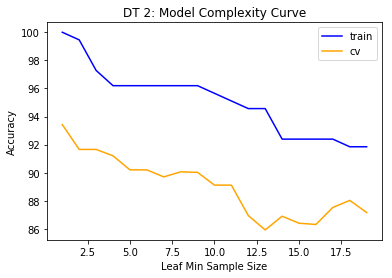

In [35]:
###### Model Complexity ########

# try leaf 1 through 20 and record training and testing accuracy
leaf_range = list(range(1, 20))
train_scores = []
test_scores = []
cv_scores = []
for i in leaf_range:
    clf = DecisionTreeClassifier(min_samples_leaf = i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    train_scores.append(clf.score(X_train, y_train)*100)
    test_scores.append(clf.score(X_test, y_test)*100)
    cv = cross_val_score(clf, X_train, y_train, cv=10)
    cv_mean = np.array(cv).mean() * 100
    cv_scores.append(cv_mean)

print "train accuracy: ", train_scores
print
#print test_scores
#print
print "cv accuracy: ", cv_scores
print

plt.plot(leaf_range, train_scores, color='blue', label='train')
plt.plot(leaf_range, cv_scores, color='orange', label='cv')
plt.xlabel('Leaf Min Sample Size')
plt.ylabel('Accuracy')
plt.title('DT 2: Model Complexity Curve')
plt.legend()



In [64]:
##### Test Model On Holdout Group  #####

clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf = 7)
clf.fit(X, y)

y_pred = clf.predict(X_test_holdout)

print('Accuracy on the training subset: {:.3f}'.format(clf.score(X, y)))
print('Accuracy on the test subset: {:.3f}'.format(clf.score(X_test_holdout, y_test_holdout)))
print(metrics.confusion_matrix(y_test_holdout, y_pred))

Accuracy on the training subset: 0.956
Accuracy on the test subset: 0.947
[[42  2]
 [ 4 66]]


In [65]:
##### Test Model On Holdout Group  #####

clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 7)
clf.fit(X, y)

y_pred = clf.predict(X_test_holdout)

print('Accuracy on the training subset: {:.3f}'.format(clf.score(X, y)))
print('Accuracy on the test subset: {:.3f}'.format(clf.score(X_test_holdout, y_test_holdout)))
print(metrics.confusion_matrix(y_test_holdout, y_pred))

Accuracy on the training subset: 0.976
Accuracy on the test subset: 0.947
[[39  5]
 [ 1 69]]
